# Tarefa 1: Aprendizado Supervisionado

**Autor**: Matheus Jericó Palhares <br>
**LinkedIn**: https://linkedin.com/in/matheusjerico <br>
**Github**: https://github.com/matheusjerico

## 1) Tarefa:
**1. Utilizar apenas as colunas age, chol, thalach e target;** {ok} <br>
**2. Separar aleatoriamente e de forma equilibrada o dataset, utilizando 70% como conjunto de treinamento;**<br>
**3. Utilizar, também de forma equilibrada, 15% para validação e 15% para teste;** {ok} <br>
**4. Implementar o processo de treinamento e validação do modelo, plotando as curvas com as evoluções dos erros de treinamento e de validação;**<br>
**5. Pesquisar a respeito de matrizes de confusão para classificação binária, gere uma relativa ao seu conjunto de testes e calcule o máximo de métricas que você julgar interessantes para avaliar seu modelo.**

### 1. Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, precision_score
import tensorflow as tf
import seaborn as sns

### 2. Carregando dados

In [2]:
dataset = pd.read_csv("./Dataset/heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.shape

(303, 14)

### 3. Filtrando dados para o problema proposto

In [4]:
df = dataset[['age', 'chol', 'thalach', 'target']].copy()

In [5]:
df.head()

,age,chol,thalach,target
0,63,233,150,1
1,37,250,187,1
2,41,204,172,1
3,56,236,178,1
4,57,354,163,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      303 non-null    int64
 1   chol     303 non-null    int64
 2   thalach  303 non-null    int64
 3   target   303 non-null    int64
dtypes: int64(4)
memory usage: 9.6 KB


In [7]:
df.describe()

,age,chol,thalach,target
count,303.000000,303.000000,303.000000,303.000000
mean,54.366337,246.264026,149.646865,0.544554
std,9.082101,51.830751,22.905161,0.498835
min,29.000000,126.000000,71.000000,0.000000
25%,47.500000,211.000000,133.500000,0.000000
50%,55.000000,240.000000,153.000000,1.000000
75%,61.000000,274.500000,166.000000,1.000000
max,77.000000,564.000000,202.000000,1.000000


### 3. Separando dados

In [8]:
X = df.drop(columns='target')
y = df['target'].copy()

In [9]:
X.head()

,age,chol,thalach
0,63,233,150
1,37,250,187
2,41,204,172
3,56,236,178
4,57,354,163


In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 4. Separando dados de treino, teste e validação

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify=y, random_state = 43)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, stratify= y_test,random_state = 43)

In [12]:
print(f"Quantidade de registros e dimensão X: {X.shape}")
print(f"Quantidade de registros e dimensão y: {y.shape}\n")
print(f"Quantidade de registros e dimensão X_train: {X_train.shape}")
print(f"Quantidade de registros e dimensão y_train: {y_train.shape}\n")
print(f"Quantidade de registros e dimensão X_test: {X_test.shape}")
print(f"Quantidade de registros e dimensão y_test: {y_test.shape}\n")
print(f"Quantidade de registros e dimensão X_val: {X_val.shape}")
print(f"Quantidade de registros e dimensão y_val: {y_val.shape}\n")

Quantidade de registros e dimensão X: (303, 3)
Quantidade de registros e dimensão y: (303,)

Quantidade de registros e dimensão X_train: (212, 3)
Quantidade de registros e dimensão y_train: (212,)

Quantidade de registros e dimensão X_test: (45, 3)
Quantidade de registros e dimensão y_test: (45,)

Quantidade de registros e dimensão X_val: (46, 3)
Quantidade de registros e dimensão y_val: (46,)



### 5. Criação do algoritmo

In [13]:
def create_model(input_dim = 3):
    model = Sequential([
               tf.keras.layers.Dense(units=16, 
                                     activation = 'relu', 
                                     kernel_initializer = 'normal',
                                     input_dim=input_dim),
               tf.keras.layers.Dropout(0.2),
               tf.keras.layers.Dense(units=16,
                                     activation = 'relu',
                                     kernel_initializer = 'normal'),
               tf.keras.layers.Dropout(0.2),
               tf.keras.layers.Dense(units=1, activation = 'sigmoid')])

    return model

In [14]:
model = create_model(input_dim=3)
otimizador = tf.keras.optimizers.Adam(lr = 0.01, decay = 0.0001, clipvalue = 0.5)

### 6. Normalizando os dados

In [15]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

### 6. Treinamento do algoritmo

In [16]:
model.compile(optimizer = otimizador, loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                64        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [18]:
EPOCHS = 50
BS = 12

H = model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs = EPOCHS, 
              batch_size = BS,      
              shuffle=True)

Train on 212 samples, validate on 46 samples
Epoch 1/50
212/212 [==============================] - 1s 6ms/sample - loss: 0.6809 - binary_accuracy: 0.6179 - val_loss: 0.6479 - val_binary_accuracy: 0.6522
Epoch 2/50
212/212 [==============================] - 0s 756us/sample - loss: 0.6015 - binary_accuracy: 0.6698 - val_loss: 0.5729 - val_binary_accuracy: 0.6739
Epoch 3/50
212/212 [==============================] - 0s 677us/sample - loss: 0.5811 - binary_accuracy: 0.6887 - val_loss: 0.5499 - val_binary_accuracy: 0.6739
Epoch 4/50
212/212 [==============================] - 0s 807us/sample - loss: 0.5716 - binary_accuracy: 0.6651 - val_loss: 0.5467 - val_binary_accuracy: 0.6739
Epoch 5/50
212/212 [==============================] - 0s 545us/sample - loss: 0.5715 - binary_accuracy: 0.6745 - val_loss: 0.5470 - val_binary_accuracy: 0.6739
Epoch 6/50
212/212 [==============================] - 0s 690us/sample - loss: 0.5715 - binary_accuracy: 0.7028 - val_loss: 0.5538 - val_binary_accuracy: 0.67

### 7. Predição

In [19]:
y_pred = model.predict_classes(X_test)

### 8. Gráfico de evolução de métricas de treinamento

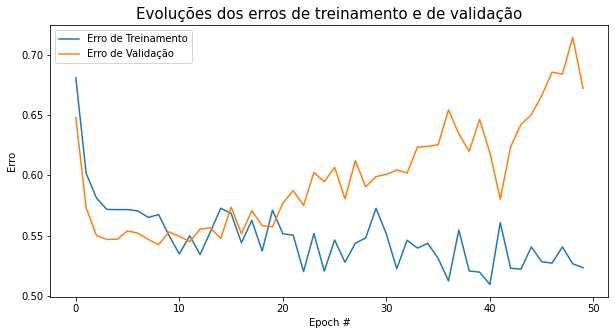

In [20]:
N = 50
plt.figure(figsize = (10,5))
plt.plot(np.arange(0, N), H.history["loss"], label="Erro de Treinamento")
plt.plot(np.arange(0, N), H.history["val_loss"], label="Erro de Validação")
plt.title("Evoluções dos erros de treinamento e de validação", size=15)
plt.xlabel("Epoch #")
plt.ylabel("Erro")
plt.legend(loc="best", prop={"size": 10})

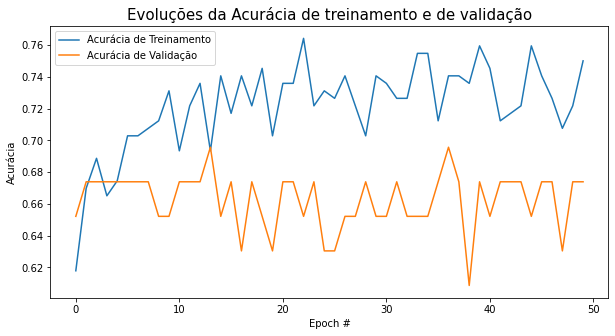

In [21]:
N = 50
plt.figure(figsize = (10,5))
plt.plot(np.arange(0, N), H.history["binary_accuracy"], label="Acurácia de Treinamento")
plt.plot(np.arange(0, N), H.history["val_binary_accuracy"], label="Acurácia de Validação")
plt.title("Evoluções da Acurácia de treinamento e de validação", size=15)
plt.xlabel("Epoch #")
plt.ylabel("Acurácia")
plt.legend(loc="best", prop={"size": 10})

### 9. Métricas

#### 9.1. Matriz de Confusão

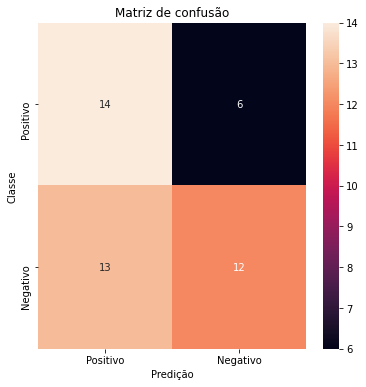

In [22]:
LABELS = ["Positivo", "Negativo"]
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Matriz de confusão")
plt.ylabel('Classe')
plt.xlabel('Predição')
plt.show()

#### 9.2. Precision & Accuracy

In [23]:
print(f'Precision: {precision_score(y_test, y_pred)}')

Precision: 0.6666666666666666


In [24]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.5777777777777777


#### 9.3. ROC AUC

In [25]:
roc_auc_score(y_test, y_pred)

0.59

#### 9.4. F1-Score

In [26]:
print(f'Accuracy: {f1_score(y_test, y_pred)}') 

Accuracy: 0.5581395348837209


#### 9.5. Tudo junto & Misturado (Precision, Recall e F1-score)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.70      0.60        20
           1       0.67      0.48      0.56        25

    accuracy                           0.58        45
   macro avg       0.59      0.59      0.58        45
weighted avg       0.60      0.58      0.57        45



# DESAFIO
**Utilizando todos os dados do dataset**

### 1. Separação dos dados

In [28]:
df = dataset.copy()

In [29]:
X = df.drop(columns='target')
y = df['target'].copy()

In [30]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify=y, random_state = 43)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, stratify= y_test,random_state = 43)

### 2. Criação do modelo

In [32]:
model = create_model(input_dim=13)
otimizador = tf.keras.optimizers.Adam(lr = 0.01, decay = 0.0001, clipvalue = 0.5)

### 3. Normalizando

In [33]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

### 4. Treinamento

In [34]:
model.compile(optimizer = otimizador, loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])

In [35]:
EPOCHS = 50
BS = 12

H = model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs = EPOCHS, 
              batch_size = BS,      
              shuffle=True)

Train on 212 samples, validate on 46 samples
Epoch 1/50
212/212 [==============================] - 1s 5ms/sample - loss: 0.5833 - binary_accuracy: 0.7642 - val_loss: 0.3558 - val_binary_accuracy: 0.8913
Epoch 2/50
212/212 [==============================] - 0s 602us/sample - loss: 0.3786 - binary_accuracy: 0.8443 - val_loss: 0.3046 - val_binary_accuracy: 0.8696
Epoch 3/50
212/212 [==============================] - 0s 517us/sample - loss: 0.3437 - binary_accuracy: 0.8679 - val_loss: 0.2864 - val_binary_accuracy: 0.8478
Epoch 4/50
212/212 [==============================] - 0s 597us/sample - loss: 0.3241 - binary_accuracy: 0.8443 - val_loss: 0.3022 - val_binary_accuracy: 0.8478
Epoch 5/50
212/212 [==============================] - 0s 582us/sample - loss: 0.3236 - binary_accuracy: 0.8726 - val_loss: 0.3110 - val_binary_accuracy: 0.8478
Epoch 6/50
212/212 [==============================] - 0s 520us/sample - loss: 0.3506 - binary_accuracy: 0.8679 - val_loss: 0.2842 - val_binary_accuracy: 0.86

### 5. Predição

In [36]:
y_pred = model.predict_classes(X_test)

### 6. Gráfico de evolução de métricas de treinamento

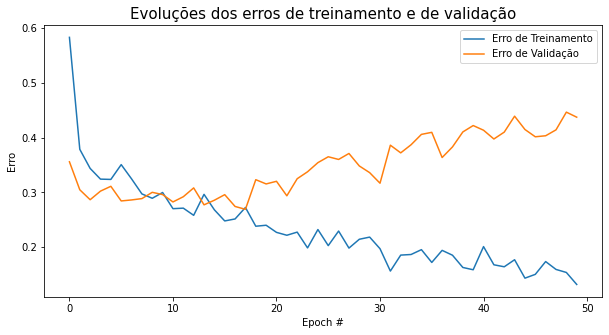

In [37]:
N = 50
plt.figure(figsize = (10,5))
plt.plot(np.arange(0, N), H.history["loss"], label="Erro de Treinamento")
plt.plot(np.arange(0, N), H.history["val_loss"], label="Erro de Validação")
plt.title("Evoluções dos erros de treinamento e de validação", size=15)
plt.xlabel("Epoch #")
plt.ylabel("Erro")
plt.legend(loc="best", prop={"size": 10})

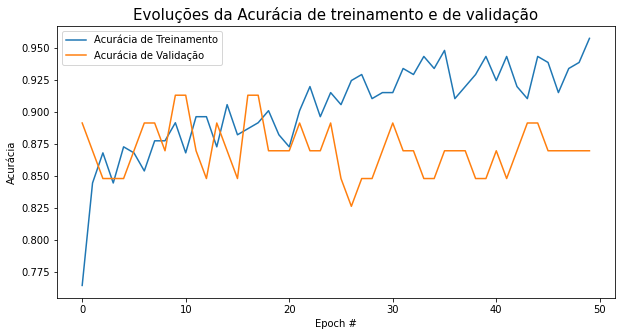

In [38]:
N = 50
plt.figure(figsize = (10,5))
plt.plot(np.arange(0, N), H.history["binary_accuracy"], label="Acurácia de Treinamento")
plt.plot(np.arange(0, N), H.history["val_binary_accuracy"], label="Acurácia de Validação")
plt.title("Evoluções da Acurácia de treinamento e de validação", size=15)
plt.xlabel("Epoch #")
plt.ylabel("Acurácia")
plt.legend(loc="best", prop={"size": 10})

### 7. Métricas

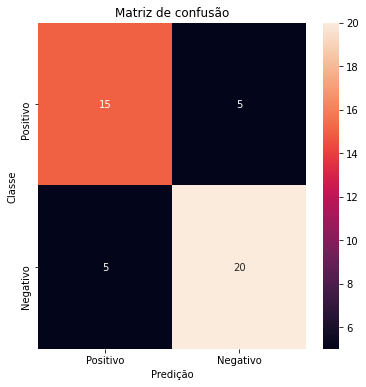

In [39]:
LABELS = ["Positivo", "Negativo"]
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Matriz de confusão")
plt.ylabel('Classe')
plt.xlabel('Predição')
plt.show()

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.80      0.80      0.80        25

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45



In [42]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7777777777777778


**Análise:** 
- O desempenho melhorou consideravelmente analisando a matriz de confusão, acurácia, recall e f1-score.
- O incremento na quantidade de features mostrou melhorar o desempenho do modelo de redes neurais.  